In [2]:
import numpy as np
import pickle
import random
import matplotlib.pyplot as plt


'''
Load the Data
'''

# Load pickled data
training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Check the loaded data
assert (len(X_train) == len(y_train)),"train data length does not match"
assert (len(X_valid) == len(y_valid)),"validation data length does not match"
assert (len(X_test) == len(y_test)),"test data length does not match"

In [3]:
'''
Print shapes of the loaded data
'''
# Train
print('X_train data shape : {}'.format(X_train.shape))
print('y_train data shape : {}'.format(y_train.shape))

# Validation
print('X_valid data shape : {}'.format(X_valid.shape))
print('y_valid data shape : {}'.format(y_valid.shape))

# Test
print('X_test data shape : {}'.format(X_test.shape))
print('y_test data shape : {}'.format(y_test.shape))

X_train data shape : (34799, 32, 32, 3)
y_train data shape : (34799,)
X_valid data shape : (4410, 32, 32, 3)
y_valid data shape : (4410,)
X_test data shape : (12630, 32, 32, 3)
y_test data shape : (12630,)


In [4]:
'''
Basic Summary of the Data Set 
'''
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1], X_train.shape[2]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape[0], 'x', image_shape[1])
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 32 x 32
Number of classes = 43


In [5]:
import pandas as pd

'''
Import Class Id and Sign Names
'''

data = pd.read_csv('signnames.csv') 
print(data.tail())

ClassId = data['ClassId']
SignName = data['SignName']

    ClassId                                           SignName
38       38                                         Keep right
39       39                                          Keep left
40       40                               Roundabout mandatory
41       41                                  End of no passing
42       42  End of no passing by vehicles over 3.5 metric ...


32484
1809
13938


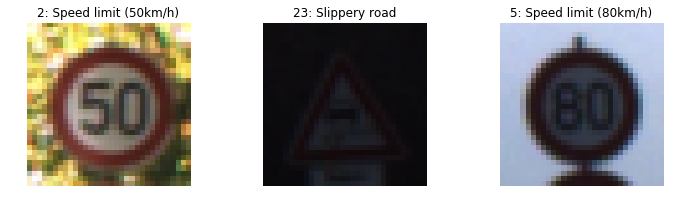

In [6]:
%matplotlib inline

'''
Show three random example of data image
'''

num_example = 3
fig, axes = plt.subplots(1, num_example, figsize=(12,3))

for i in range(3):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    answer = y_train[index]
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title('{}: {}'.format(ClassId[answer],SignName[answer]))
    print(index)

Text(19,675,'Test total number: 12630')

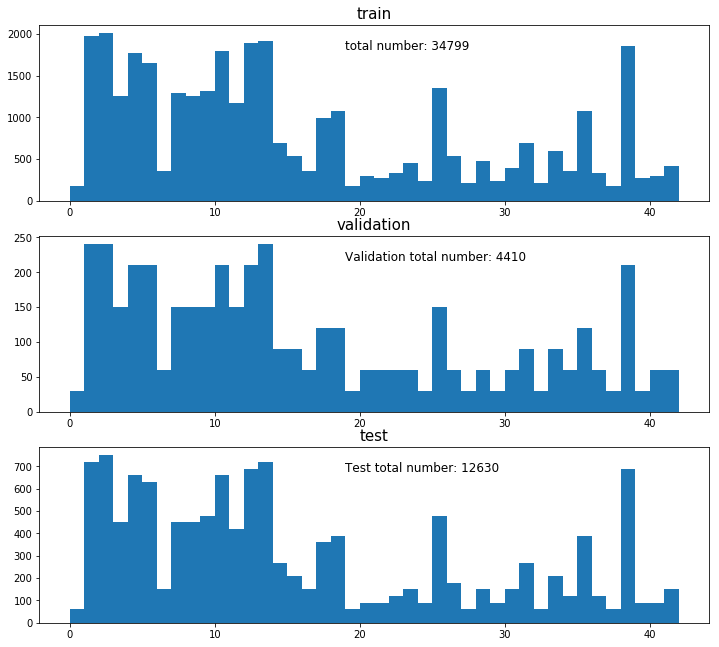

In [7]:
'''
Check distribution of the dataset with histogram
'''

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,11))

# train data
ax1.hist(y_train, np.unique(y_train))
ax1.set_title('train', fontsize=15)
ax1.text(19,np.max(np.bincount(y_train))*0.9,'total number: {}'.format(len(y_train)), fontsize=12)

# valid data
ax2.hist(y_valid, np.unique(y_valid))
ax2.set_title('validation', fontsize=15)
ax2.text(19,np.max(np.bincount(y_valid))*0.9,'Validation total number: {}'.format(len(y_valid)), fontsize=12)

# test data
ax3.hist(y_test, np.unique(y_test))
ax3.set_title('test', fontsize=15)
ax3.text(19,np.max(np.bincount(y_test))*0.9,'Test total number: {}'.format(len(y_test)), fontsize=12)

From the histogram above, note that some classes appear MUCH more than others!


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
'''
Convert the images to gray scale
'''

def cvtGrey(img):
    img_grey = np.sum(img/3, axis=3, keepdims=True)
    return img_grey


X_train_grey = cvtGrey(X_train)
X_valid_grey = cvtGrey(X_valid)
X_test_grey = cvtGrey(X_test)

In [9]:
'''
Normalize the color values to have mean = 0
'''

def normalize(img):
    img_normalized = (img - 128) / 128
    return img_normalized

X_train_normalized = normalize(X_train_grey)
X_valid_normalized = normalize(X_valid_grey)
X_test_normalized = normalize(X_test_grey)

Text(0.5,1,'normalized')

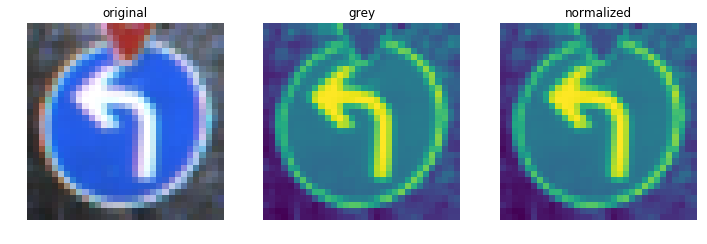

In [10]:
'''
Compare: original, grey, normalized
'''

index = 20213    # randome index for comparison

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,11))
ax1.axis('off')
ax1.imshow(X_train[index].squeeze())
ax1.set_title('original')

ax2.axis('off')
ax2.imshow(X_train_grey[index].squeeze())
ax2.set_title('grey')

ax3.axis('off')
ax3.imshow(X_train_normalized[index].squeeze())
ax3.set_title('normalized')

Text(0.5,1,'color changed')

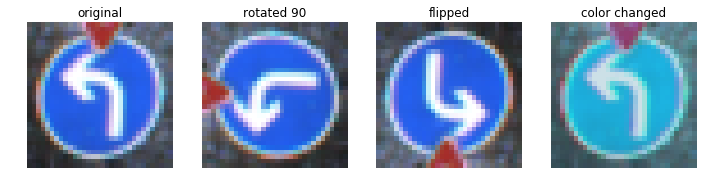

In [11]:
import tensorflow as tf
'''
Set up tools for image augmentation
'''

def aug_rotate(x: tf.Tensor) -> tf.Tensor:
    """Rotation augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """

    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(x, 1)

def aug_flip(x: tf.Tensor) -> tf.Tensor:
    """Flip augmentation

    Args:
        x: Image to flip

    Returns:
        Augmented image
    """
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)

    return x

def aug_color(x: tf.Tensor) -> tf.Tensor:
    """Color augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """
    x = tf.image.random_hue(x, 0.08)
    x = tf.image.random_saturation(x, 0.6, 1.6)
    x = tf.image.random_brightness(x, 0.05)
    x = tf.image.random_contrast(x, 0.7, 1.3)
    return x


def image_augmentation(img):
    im1 = aug_rotate(img)
    im2 = aug_flip(img)
    im3 = aug_color(img)
    
    return im1, im2, im3

index = 20213    # randome index for comparison
example = X_train[index]

# run image augmentation
rotated, flipped, colored = image_augmentation(example)

# initiate tensorflow graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
rotated = sess.run(rotated)
flipped = sess.run(flipped)
colored = sess.run(colored)

# plot the results for comparison
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,11))
ax1.axis('off')
ax1.imshow(example)
ax1.set_title('original')

ax2.axis('off')
ax2.imshow(rotated)
ax2.set_title('rotated 90')

ax3.axis('off')
ax3.imshow(flipped)
ax3.set_title('flipped')

ax4.axis('off')
ax4.imshow(colored)
ax4.set_title('color changed')

In [12]:
from IPython.display import clear_output

'''
Running image augmentation on the datasets
'''

def data_augmentation(X_data, y_data, n_classes, sess):
    
    mean = len(y_data) / n_classes

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for i in range(n_classes):
            
            inds = np.where(y_data==i)[0]
            img_cnt = 1
            if len(inds) < (mean):    
                for ind in range(len(inds)):
                    
                    if len(inds)+ind > mean:   # augment until it reachs mean
                        break
                    
                    else:
                        clear_output()
                        print('Augmenting class #{}, image {} / {}'.format(i, img_cnt, len(inds)))
                        img_cnt += 1

                        img_rot,img_flip,img_color = image_augmentation(X_data[inds[ind]])
                        img_rot = img_rot[None,:,:,:]
                        img_flip = img_flip[None,:,:,:]
                        img_color = img_color[None,:,:,:]
                        img_rot = sess.run(img_rot)
                        img_flip = sess.run(img_flip)
                        img_color = sess.run(img_color)

                        X_data = np.concatenate((X_data,img_rot,img_flip,img_color))
                        y_data = np.concatenate((y_data, [i],[i],[i]))
    clear_output()
    print('Augmentation Finished')
                
    return X_data, y_data

In [12]:
'''
Augment Training dataset
Augment Validation dataset
'''

# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     X_train_aug, y_train_aug = data_augmentation(X_train, y_train, n_classes, sess)
#     X_valid_aug, y_valid_aug = data_augmentation(X_valid, y_valid, n_classes, sess)

# print('train')
# print('Original: ', X_train.shape, y_train.shape)
# print('Augmented: ', X_train_aug.shape, y_train_aug.shape)
# print('\nvalid')
# print('Original: ', X_valid.shape, y_valid.shape)
# print('Augmented: ', X_valid_aug.shape, y_valid_aug.shape)

'\nAugment Training dataset\nAugment Validation dataset\n'

In [13]:
'''
Save the augmented validation dataset for later use (No need to run every time)
'''
# with open('./data/X_train_aug.p', mode='wb') as f:
#     pickle.dump(X_train_aug, f)
# with open('./data/y_train_aug.p', mode='wb') as f:
#     pickle.dump(y_train_aug, f)

# with open('./data/X_valid_aug.p', mode='wb') as f:
#     pickle.dump(X_valid_aug, f)
# with open('./data/y_valid_aug.p', mode='wb') as f:
#     pickle.dump(y_valid_aug, f)

'\nSave the augmented validation dataset for later use (No need to run every time)\n'

In [14]:
'''
Load the augmented training dataset
'''

with open('./data/X_train_aug.p', mode='rb') as f:
    X_train_aug = pickle.load(f)
with open('./data/y_train_aug.p', mode='rb') as f:
    y_train_aug = pickle.load(f)    
    
print(X_train_aug.shape)
print(y_train_aug.shape)

(46480, 32, 32, 1)
(46480,)


In [15]:
'''
Load the augmented validation dataset
'''

with open('./data/X_valid_aug.p', mode='rb') as f:
    X_valid_aug = pickle.load(f)
with open('./data/y_valid_aug.p', mode='rb') as f:
    y_valid_aug = pickle.load(f)

print(X_valid_aug.shape)
print(y_valid_aug.shape)    

(5630, 32, 32, 1)
(5630,)


Text(19,2000,'Validation total number: 34799')

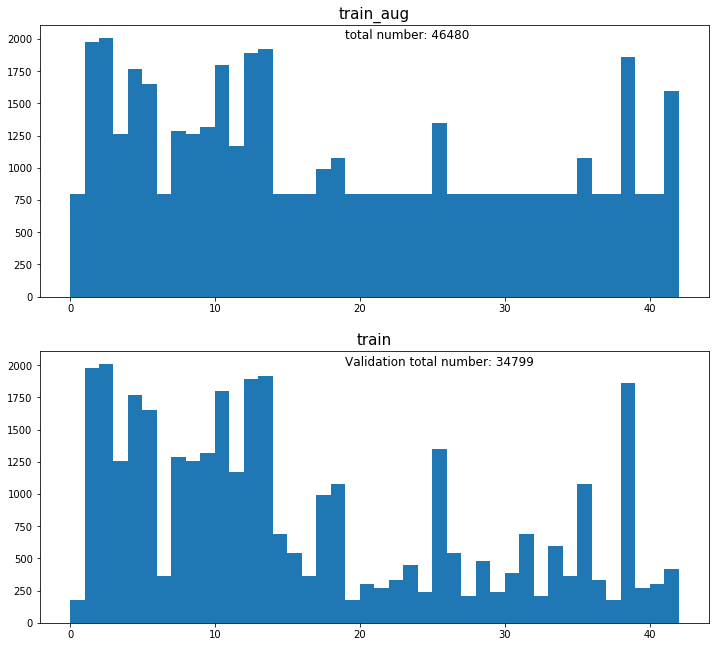

In [16]:
'''
Compare the augmented training dataset to the original
'''

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,11))

# train_aug data
ax1.hist(y_train_aug, np.unique(y_train_aug))
ax1.set_title('train_aug', fontsize=15)
ax1.text(19,2000,'total number: {}'.format(len(y_train_aug)), fontsize=12)

# train data
ax2.hist(y_train, np.unique(y_train))
ax2.set_title('train', fontsize=15)
ax2.text(19,2000,'Validation total number: {}'.format(len(y_train)), fontsize=12)

Text(19,200,'Validation total number: 4410')

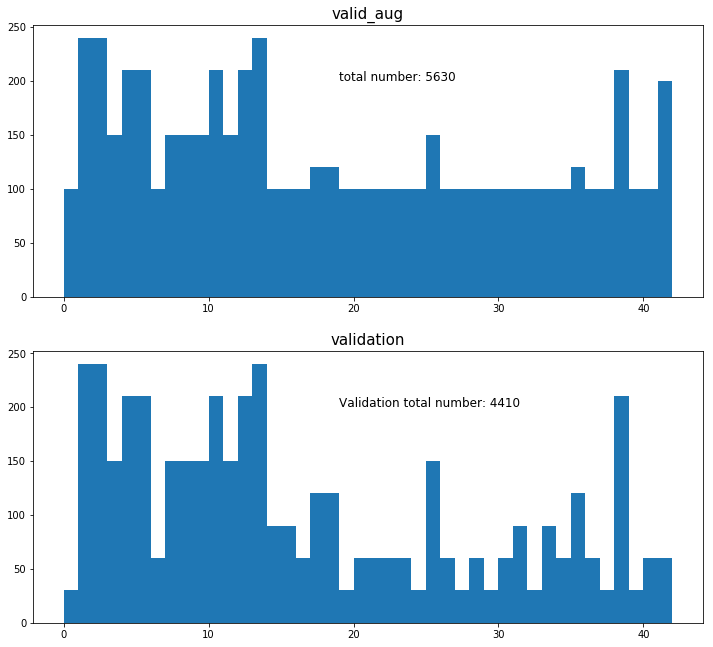

In [17]:
'''
Compare the augmented validation dataset to the original
'''
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,11))

# valid_aug data
ax1.hist(y_valid_aug, np.unique(y_valid_aug))
ax1.set_title('valid_aug', fontsize=15)
ax1.text(19,200,'total number: {}'.format(len(y_valid_aug)), fontsize=12)

# valid data
ax2.hist(y_valid, np.unique(y_valid))
ax2.set_title('validation', fontsize=15)
ax2.text(19,200,'Validation total number: {}'.format(len(y_valid)), fontsize=12)

In [18]:
import tensorflow as tf

'''
Set up hyper-parameters for tensorflow
'''

rate = 0.0009
EPOCHS = 25
BATCH_SIZE = 256
rate = 0.003

In [19]:
'''
Model Architecture: LeNet
'''

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))    
    x = tf.add(tf.matmul(x, W3), b3)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W5), b5)
    
    return logits

In [20]:
'''
Make tensorflow variables
'''
tf.reset_default_graph()   # reset the graph

# input
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# output
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# keeping-probability for "dropouts"
keep_prob = tf.placeholder(tf.float32) # probability to keep units

In [21]:
from tensorflow.contrib.layers import flatten

'''
Build the Training process
'''

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
from sklearn.utils import shuffle

'''
Run the Training process
'''

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_aug)
    
    print("Training begins...")
    print()
    for i in range(EPOCHS):
        X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[offset:end], y_train_aug[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_accuracy = evaluate(X_train_aug, y_train_aug)
        validation_accuracy = evaluate(X_valid_aug, y_valid_aug)
        print("EPOCH {} ...".format(i+1))
        print("Training  Accuracy  = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Training ended")
    print("Model saved")

Training begins...

EPOCH 1 ...
Training  Accuracy  = 0.766
Validation Accuracy = 0.712

EPOCH 2 ...
Training  Accuracy  = 0.882
Validation Accuracy = 0.829

EPOCH 3 ...
Training  Accuracy  = 0.922
Validation Accuracy = 0.865

EPOCH 4 ...
Training  Accuracy  = 0.945
Validation Accuracy = 0.884

EPOCH 5 ...
Training  Accuracy  = 0.956
Validation Accuracy = 0.902

EPOCH 6 ...
Training  Accuracy  = 0.961
Validation Accuracy = 0.912

EPOCH 7 ...
Training  Accuracy  = 0.972
Validation Accuracy = 0.910

EPOCH 8 ...
Training  Accuracy  = 0.973
Validation Accuracy = 0.916

EPOCH 9 ...
Training  Accuracy  = 0.976
Validation Accuracy = 0.917

EPOCH 10 ...
Training  Accuracy  = 0.980
Validation Accuracy = 0.921

EPOCH 11 ...
Training  Accuracy  = 0.984
Validation Accuracy = 0.925

EPOCH 12 ...
Training  Accuracy  = 0.983
Validation Accuracy = 0.928

EPOCH 13 ...
Training  Accuracy  = 0.986
Validation Accuracy = 0.918

EPOCH 14 ...
Training  Accuracy  = 0.987
Validation Accuracy = 0.933

EPOCH 15 

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.942


### Predict the Sign Type for Each Image

In [24]:
'''
Check variable names for setting up the model
'''

print(logits)
print(keep_prob)
print(x)

Tensor("Add_2:0", shape=(?, 43), dtype=float32)
Tensor("Placeholder_2:0", dtype=float32)
Tensor("Placeholder:0", shape=(?, 32, 32, 1), dtype=float32)


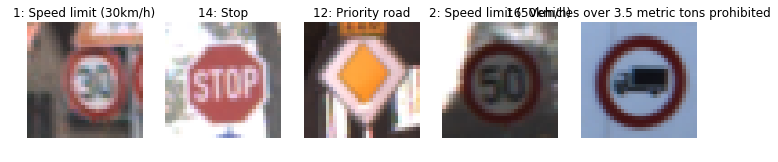

In [25]:
import glob

'''
Load downloaded images
'''
downloaded_images = sorted(glob.glob('./downloaded_images/*.png'))
downloaded_labels = np.array([1, 14, 12, 2, 16])

num_example = 5
fig, axes = plt.subplots(1, num_example, figsize=(12,3))
images = np.zeros((5,32,32,3))

for i in range(len(downloaded_labels)):
    images[i] = plt.imread(downloaded_images[i])
    image = plt.imread(downloaded_images[i])
    answer = downloaded_labels[i]
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title('{}: {}'.format(ClassId[answer],SignName[answer]))

Text(0.5,1,'normalized')

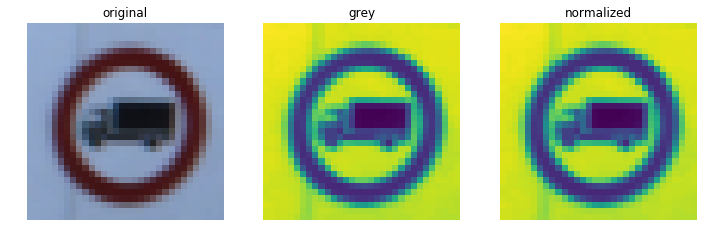

In [26]:
'''
preprocess the downloaded images
'''

# convert to grey scale
images_grey = cvtGrey(images)

# normalize to have mean = 0
images_normalized = normalize(images_grey)

# check the result
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,11))
ax1.axis('off')
ax1.imshow(images[4].squeeze())
ax1.set_title('original')

ax2.axis('off')
ax2.imshow(images_grey[4].squeeze())
ax2.set_title('grey')

ax3.axis('off')
ax3.imshow(images_normalized[4].squeeze())
ax3.set_title('normalized')

In [27]:
''' 
Test the model with the downloaded images
'''    

init = tf.global_variables_initializer()
with tf.Session() as sess:
    imported = tf.train.import_meta_graph('lenet.meta')
    imported.restore(sess, 'lenet')

    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("Placeholder:0")
    keep_prob = graph.get_tensor_by_name("Placeholder_2:0")
    y = graph.get_tensor_by_name("Add_2:0")   # last Fully Connected Network
    
    score = 0
    for i in range(5):
        output = sess.run(y, feed_dict={x: images_grey[i].reshape((1,32,32,1)), keep_prob: 1.0 })
        prediction = np.argmax(output)
        answer = downloaded_labels[i]
        print('prediction: {}, answer: {}'.format(prediction, answer))
        
        if prediction == answer:
            print('#', i+1,': correct')
            score += 1
        else:
            print('#', i+1,': wrong')

    print('Test Accuracy: {}%'.format(score/5 * 100))

INFO:tensorflow:Restoring parameters from lenet
prediction: 1, answer: 1
# 1 : correct
prediction: 14, answer: 14
# 2 : correct
prediction: 12, answer: 12
# 3 : correct
prediction: 2, answer: 2
# 4 : correct
prediction: 16, answer: 16
# 5 : correct
Test Accuracy: 100.0%


In [28]:
'''
Print out the top five softmax probabilities for the predictions
'''

k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    sm_logits = sess.run(softmax_logits, feed_dict={x: images_grey, keep_prob: 1.0})
    top5 = sess.run(top_k, feed_dict={x: images_grey, keep_prob: 1.0})
    
    print(top5)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  6.30766273e-01,   1.52271092e-01,   7.64491484e-02,
          7.54333884e-02,   4.05259728e-02],
       [  9.99997020e-01,   2.74963077e-06,   1.07703741e-07,
          1.00150331e-07,   8.46000159e-09],
       [  9.99999762e-01,   2.50623174e-07,   4.44629258e-08,
          2.88620683e-09,   1.37493184e-09],
       [  9.98996675e-01,   7.10501510e-04,   2.89492978e-04,
          2.51901361e-06,   6.39615678e-07],
       [  9.99325991e-01,   5.19194058e-04,   1.08435452e-04,
          4.14070564e-05,   1.74111415e-06]], dtype=float32), indices=array([[ 1,  2,  0,  4,  5],
       [14, 38, 34,  1, 13],
       [12, 40, 32, 41, 42],
       [ 2,  5,  3,  1,  7],
       [16, 37, 35,  9, 33]], dtype=int32))


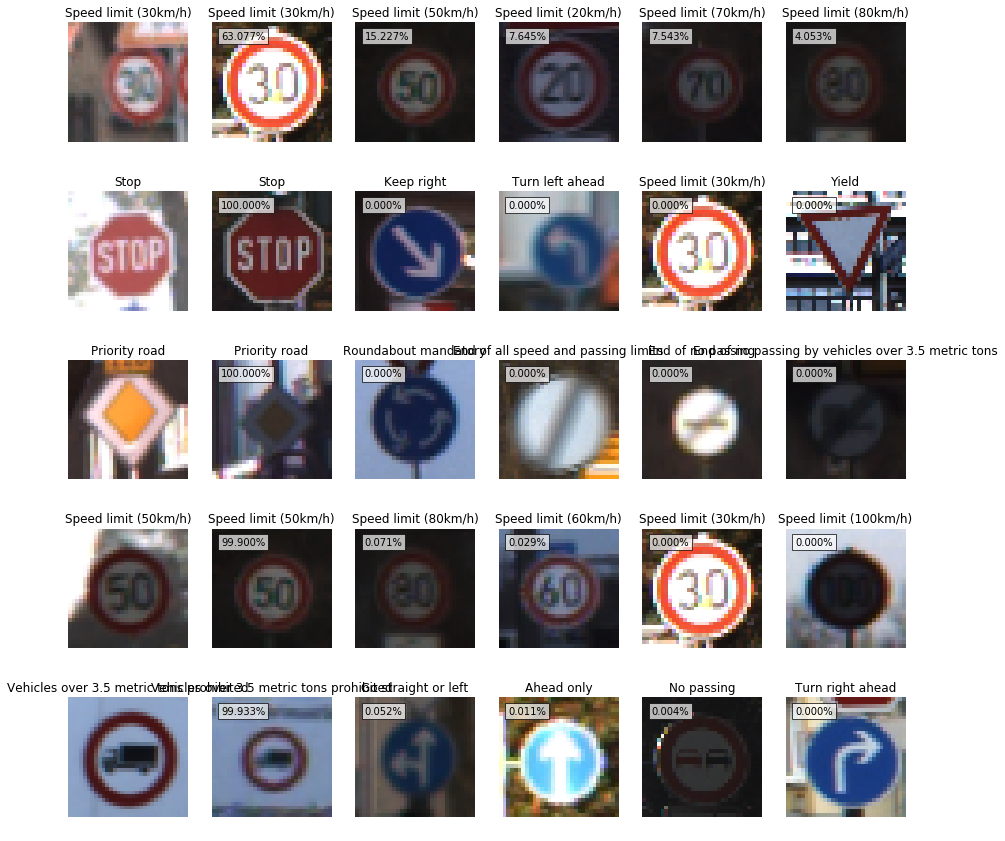

In [29]:
'''
Show the top five softmax probabilities for the predictions
'''

# build figures and subplots
num_example = 5
num_prediction = 5
fig, axes = plt.subplots(num_example, num_prediction+1, figsize=(15,15))
images = np.zeros((5,32,32,3))

for i in range(num_example):
    # original input
    image = plt.imread(downloaded_images[i])
    answer = downloaded_labels[i]    
    axes[i][0].axis('off')
    axes[i][0].imshow(image)
    axes[i][0].set_title('{}'.format(SignName[answer]))
    
    for j in range(num_prediction):
        #predictions
        images[i] = plt.imread(downloaded_images[i])
        pred = top5[1][i][j]    # index
        image = X_test[np.argwhere(y_test == pred)][1].squeeze()
        axes[i][j+1].axis('off')
        axes[i][j+1].imshow(image)
        axes[i][j+1].set_title('{}'.format(SignName[pred]))
        # probability of each prediction
        axes[i][j+1].text(2, 4, '{0:.3f}%'.format(top5[0][i][j]*100), bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 3})

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")